In [3]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Jupyterでインライン表示するための宣言
%matplotlib inline 
import os
import shutil
from tqdm import tqdm
import base64
import json
from requests import Request, Session
from io import BytesIO
from PIL import Image
import pandas as pd
import jaconv
import re
import cv2
import numpy as np
from symspellpy.symspellpy import SymSpell, Verbosity
import pickle
from pykakasi import kakasi
import Levenshtein
from collections import OrderedDict
import itertools

from statistics import mode
import time

In [11]:
def resize_image(filepath, width, height):
    img = Image.open(filepath)
    img.thumbnail((width, height),resample=Image.BICUBIC)
    return img
IMG_BASE_PATH = '/Users/obara/Downloads/prescription_data_jpeg/'
filename = 'photo-3.jpeg'
WIDTH = 1000
HEIGHT = 1000
file_path = IMG_BASE_PATH + filename
pillow_img = resize_image(file_path, WIDTH, HEIGHT)
resized_image_path = f'{IMG_BASE_PATH}resized_{filename}'
pillow_img.save(resized_image_path)

In [12]:
img = cv2.imread(resized_image_path)

In [13]:
rect = (1,1, pillow_img.size[0],pillow_img.size[1])

In [14]:
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

In [15]:
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 2, 2, ..., 2, 2, 2],
        [0, 2, 2, ..., 2, 2, 2],
        ...,
        [0, 2, 2, ..., 2, 2, 2],
        [0, 2, 2, ..., 2, 2, 2],
        [0, 2, 2, ..., 2, 2, 2]], dtype=uint8),
 array([[ 0.24569721,  0.14095194,  0.15196119,  0.24274639,  0.21864326,
         32.34598571, 28.12765582, 24.02448999, 40.43399975, 34.30875906,
         30.72399525, 22.13965154, 18.03929243, 14.0635177 , 36.67150368,
         32.68249399, 28.45075767, 28.39588781, 23.85459419, 19.953926  ,
          1.46309449,  1.17137771,  1.09694893,  1.17137771,  1.58045354,
          1.08542076,  1.09694893,  1.08542076,  1.46917555, 51.81363119,
         57.08671641, 61.41342768, 57.08671641, 68.82086678, 72.06002334,
         61.41342768, 72.06002334, 80.9661828 , 13.84795199, 13.42061144,
         11.53364262, 13.42061144, 13.82715022, 11.45995032, 11.53364262,
         11.45995032, 10.62458742,  2.47688451,  2.38861145,  2.25167145,
          2.38861145,  2.82387533,

In [16]:
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

In [17]:
img

AttributeError: 'numpy.ndarray' object has no attribute 'show'

In [20]:
cv2.imshow("image", img)

In [ ]:
import numpy as np
import cv2
IMROOT='/Users/obara/Downloads/prescription_data_jpeg/'
bgr = cv2.imread(IMROOT +  'photo-3.jpeg')
h, w = bgr.shape[:2]
mask = np.zeros((h,w), dtype = np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect=(1,1,w,h)
cv2.grabCut(bgr, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
dst = bgr*mask2[:,:,np.newaxis]
cv2.imshow("bgr", bgr)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
pip install torchvision

     |████████████████████████████████| 387 kB 806 kB/s eta 0:00:01
     |████████████████████████████████| 97.4 MB 69 kB/s  eta 0:00:011    |███████                         | 21.1 MB 1.7 MB/s eta 0:00:45     |████████████████████████████▎   | 86.0 MB 10.2 MB/s eta 0:00:02
  Attempting uninstall: torch
    Found existing installation: torch 1.5.0
    Uninstalling torch-1.5.0:
      Successfully uninstalled torch-1.5.0
You should consider upgrading via the '/Users/obara/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms

AttributeError: module 'torch.jit' has no attribute '_script_if_tracing'

In [4]:
import cv2

cap = cv2.VideoCapture('/Users/obara/Downloads/prescription_data_jpeg/')

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorGMG()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

AttributeError: module 'cv2.cv2' has no attribute 'createBackgroundSubtractorGMG'

In [1]:
import cv2

# 画像を読み込む。
# -1をつけることでアルファチャンネルもよんでくれるらしい
img = cv2.imread('/Users/obara/Downloads/prescription_data_jpeg/photo-3.jpeg', -1)
# アルファチャンネルだけ抜き出す
#mask = img[:, :, 3]
# 0~255まであって0が透明らしい
mask = 0
# グレースケールに変換する。
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2値化する。
thresh, binary = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)

# 輪郭を抽出する。
img_1, contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

#img_1, contours, hierarchy = cv2.findContours(img_thresh , cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# すべての輪郭を描画
cv2.drawContours(img, contours, -1, color=(0, 255, 0), thickness=2)

# 保存する。
cv2.imwrite("/Users/obara/Downloads/save_Python.png", img)

# # 表示
# cv2.imshow("img", img)
# cv2.waitKey(0)

# cv2.imshow("img", mask)
# cv2.waitKey(0)

True

In [7]:
import cv2
import numpy as np

#== Parameters =======================================================================
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 120
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
MASK_COLOR = (0.0,0.0,1.0) # In BGR format


#== Processing =======================================================================

#-- Read image -----------------------------------------------------------------------
img = cv2.imread('/Users/obara/Downloads/prescription_data_jpeg/photo-3.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#-- Edge detection -------------------------------------------------------------------
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

#-- Find contours in edges, sort by area ---------------------------------------------
contour_info = []
_, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Previously, for a previous version of cv2, this line was: 
#  contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Thanks to notes from commenters, I've updated the code but left this note
for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

#-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
# Mask is black, polygon is white
mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))

#-- Smooth mask, then blur it --------------------------------------------------------
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

#-- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = img.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')   

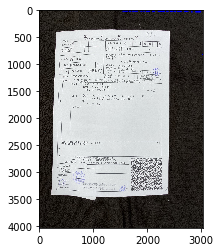

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline 
plt.imshow(masked)